#Getting the Dataset

In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:08<00:00, 23.5MB/s]
100% 163M/163M [00:08<00:00, 20.5MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


#Importing the Libraries and Dependencies

In [5]:
!pip install tensorflow

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

with_mask = os.listdir(with_mask_path)
without_mask = os.listdir(without_mask_path)
print(len(with_mask))
print(len(without_mask))

3725
3828


###Lables for dataset
with_mask_labels = [1]
without_mask_labels = [0]

In [11]:
with_mask_labels = [1]*len(with_mask)
without_mask_labels = [0]*len(without_mask)

In [12]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


#Formatting the Dataset Images

In [27]:
data = []
for img_file in with_mask:
  data.append(cv2.cvtColor(cv2.resize(cv2.imread(with_mask_path + img_file),(128,128)),cv2.COLOR_BGR2RGB))
for img_file in without_mask:
  data.append(cv2.cvtColor(cv2.resize(cv2.imread(without_mask_path + img_file),(128,128)),cv2.COLOR_BGR2RGB))

len(data)

7553

In [28]:
X = np.array(data)
Y = np.array(labels)

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

X shape: (7553, 128, 128, 3)
Y shape: (7553,)


In [34]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6042, 128, 128, 3) (6042,)
(1511, 128, 128, 3) (1511,)


In [35]:
# Scaling of the Images Data
x_train_scaled = x_train/255
x_test_scaled = x_test/255
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(x_train_scaled.min())
print(x_train_scaled.max())
print(x_test_scaled.min())
print(x_test_scaled.max())

(6042, 128, 128, 3)
(1511, 128, 128, 3)
0.0
1.0
0.0
1.0


#Building the Convolutional Neural Network

###Importing Libraries

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

###Designing the Model

In [45]:
num_of_classes = 2

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


###Compiling the Model

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [49]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9397 - loss: 0.1421 - val_acc: 0.9140 - val_loss: 0.2810
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9562 - loss: 0.1296 - val_acc: 0.9322 - val_loss: 0.2223
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - acc: 0.9597 - loss: 0.1061 - val_acc: 0.9289 - val_loss: 0.2494
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.9687 - loss: 0.0878 - val_acc: 0.9355 - val_loss: 0.2397
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9757 - loss: 0.0685 - val_acc: 0.9190 - val_loss: 0.3059


In [48]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy :', accuracy)
print('Loss :', loss)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - acc: 0.9036 - loss: 0.2278
Test Accuracy : 0.9073461294174194
Loss : 0.23916426301002502


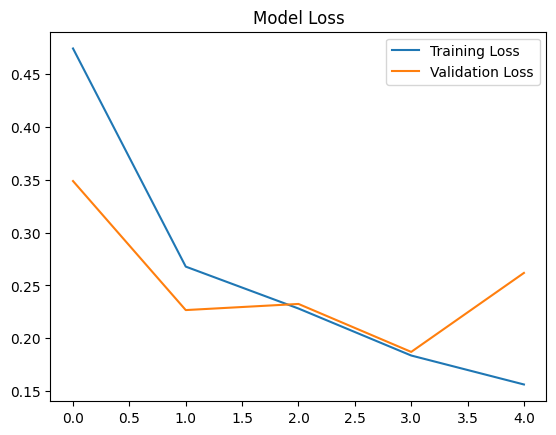

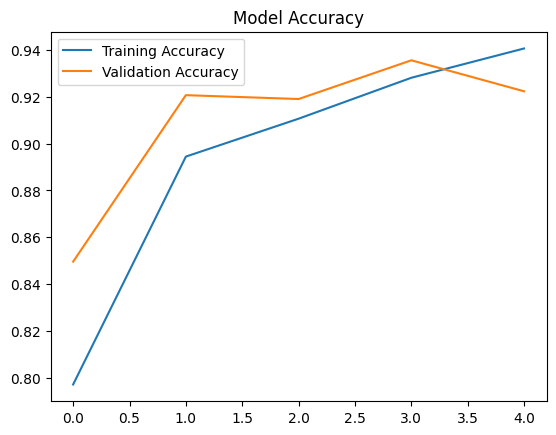

In [44]:
plt.plot(history.history['loss'],label = 'Training Loss')
plt.plot(history.history['val_loss'], label ='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label ='Training Accuracy')
plt.plot(history.history['val_acc'], label ='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


In [50]:
import pickle

In [51]:
with open('FaceDetector.pkl','wb') as f:
  pickle.dump(model,f)